In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [22]:
#Our data is not using the default encoding (utf-8) so we make sure to specify the correct encoding when reading the file
data = pd.read_csv('volcdata.csv', encoding = 'unicode_escape', engine ='python')
data = data.dropna(subset=['Longitude'])
data = data.dropna(subset=["Total Damages, Adjusted ('000 US$)"])

In [23]:
print(np.array(data['Longitude']))

['75.316W' '120.35 E' '105.423E' '120.994E' '29' '123.7 E' '130.3 E'
 '112.3 E' '98.392' '62.14 W' '112.308' '-78.442' '152.203' '-72.12'
 '17.33 W' '72.58 W' '-78.442' '15.004' '123.685' '124.79 E' '123.685'
 '86.7 W']


In [24]:
def convert_longitude(longitude):
    
    if longitude[-1]=='W':
        numeric_part= -float(longitude[:-1].strip())
    elif longitude[-1] == 'E':
        numeric_part= float(longitude[:-1].strip())
    else:
         numeric_part= float(longitude.strip())
            
    # Normalize the longitude value to be between -180 and 180
    while numeric_part > 180:
        numeric_part -= 360
    while numeric_part < -180:
        numeric_part += 360

    return numeric_part

def convert_latitude(latitude):
    # Strip any extra spaces and split by non-numeric characters
    if latitude[-1]=='S':
        numeric_part= -float(latitude[:-1].strip())
    elif latitude[-1] == 'N':
        numeric_part= float(latitude[:-1].strip())
    else:
         numeric_part= float(latitude.strip())
    
    # Normalize the latitude value to be between -90 and 90
    numeric_part = max(min(numeric_part, 90), -90)

    return numeric_part

In [26]:
lon = [convert_longitude(lon) for lon in data['Longitude']]
print(lon)

lat = [convert_latitude(lat) for lat in data['Latitude']]
print(lat)

dam = list(data["Total Damages, Adjusted ('000 US$)"]/1000)
print(dam)

[-75.316, 120.35, 105.423, 120.994, 29.0, 123.7, 130.3, 112.3, 98.392, -62.14, 112.308, -78.442, 152.203, -72.12, -17.33, -72.58, -78.442, 15.004, 123.685, 124.79, 123.685, -86.7]
[4.895, 15.13, -6.102, 14.002, 1.0, 13.3, 32.75, -7.9, 3.17, 16.45, -7.93, -1.467, -4.271, -40.59, 64.42, -45.54, -1.467, 37.734, 13.257, 1.36, 13.257, 12.5]
[2720.684, 453.406, 291.365, 92.882, 14.643, 0.989, 21.488, 17.919, 102.605, 14.586, 127.329, 217.758, 217.184, 135.308, 30.786, 32.233, 18.139, 5.124, 3.763, 2.149, 1.309, 1.387]


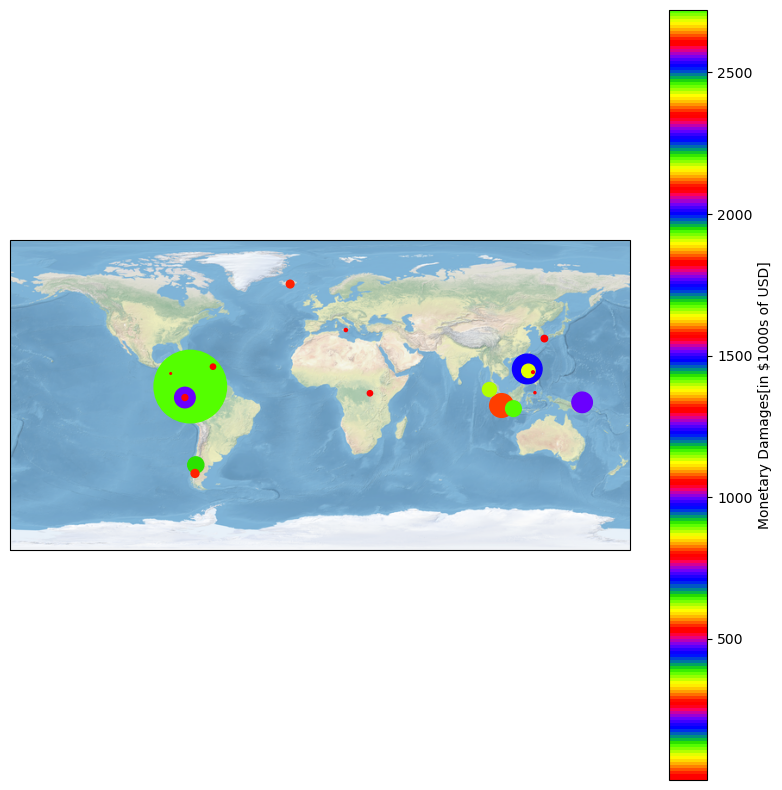

In [27]:
#Now we can plot our data, we create a new figure and cartopy projection
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
#ax.coastlines()

cmap = plt.get_cmap('prism')
norm = plt.Normalize(vmin=min(dam), vmax=max(dam))

sc = ax.scatter(lon,lat, dam, transform=ccrs.PlateCarree(), c=dam, cmap=cmap, norm=norm, marker='o')
#ax.scatter(lon,lat, death, transform=ccrs.PlateCarree(),c='r')

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Monetary Damages[in $1000s of USD]')

plt.show()